In [26]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import re
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('data/openweather_data.csv')
df.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,weather_id
0,2013-12-31,05:22:42,18:56:21,26.7,27.77,1014,61,18.56,40,10000.0,4.12,330,"{'id': 802, 'main': 'Clouds', 'description': '...",NaN,NaN,802
1,2014-01-01,05:23:20,18:56:38,24.7,25.16,1015,74,19.76,75,10000.0,3.60,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,500
2,2014-01-02,05:23:59,18:56:54,28.7,29.75,1013,54,18.48,0,10000.0,5.14,330,"{'id': 800, 'main': 'Clear', 'description': 'c...",NaN,NaN,800
3,2014-01-03,05:24:38,18:57:09,26.7,28.36,1016,70,20.78,0,10000.0,3.10,150,"{'id': 800, 'main': 'Clear', 'description': 'c...",NaN,NaN,800
4,2014-01-04,05:25:18,18:57:23,20.7,21.12,1021,88,18.64,100,NaN,7.72,180,"{'id': 500, 'main': 'Rain', 'description': 'li...",{'1h': 0.31},NaN,500


In [29]:
#changing the rain_precipitation values using regex

new_values = []

for value in df['rain_precipitation']:
    if pd.isnull(value) == True:
        value = np.nan
        new_values.append(value)
    else:
        value = re.sub("{'1h':", "", value)
        value = re.sub(" ", "", value)
        value = re.sub("}", "", value)
        new_values.append(float(value))
            
new_values

#adding the new values using regex
df = df.drop(['rain_precipitation'], axis=1)
df['rain_precip'] = new_values
df.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,wind_gust,weather_id,rain_precip
0,2013-12-31,05:22:42,18:56:21,26.7,27.77,1014,61,18.56,40,10000.0,4.12,330,"{'id': 802, 'main': 'Clouds', 'description': '...",NaN,802,NaN
1,2014-01-01,05:23:20,18:56:38,24.7,25.16,1015,74,19.76,75,10000.0,3.60,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,500,NaN
2,2014-01-02,05:23:59,18:56:54,28.7,29.75,1013,54,18.48,0,10000.0,5.14,330,"{'id': 800, 'main': 'Clear', 'description': 'c...",NaN,800,NaN
3,2014-01-03,05:24:38,18:57:09,26.7,28.36,1016,70,20.78,0,10000.0,3.10,150,"{'id': 800, 'main': 'Clear', 'description': 'c...",NaN,800,NaN
4,2014-01-04,05:25:18,18:57:23,20.7,21.12,1021,88,18.64,100,NaN,7.72,180,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,500,0.31


In [31]:
#stats
df.describe()

,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,wind_gust,weather_id,rain_precip
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.00000,2557.000000,1930.000000,2557.000000,2557.00000,112.000000,2557.000000,394.000000
mean,19.561576,19.545276,1018.809934,75.407118,14.87736,44.093469,9303.982383,3.479613,148.10481,5.004375,709.236605,0.808629
std,3.378599,3.647999,4.203342,11.636466,3.43017,40.277435,1634.663698,1.497987,77.38735,3.755914,155.584407,1.208661
min,8.350000,5.870000,984.000000,24.000000,1.14000,0.000000,200.000000,0.000000,0.00000,0.000000,200.000000,0.100000
25%,17.290000,17.100000,1016.000000,71.000000,12.61000,0.000000,9999.000000,2.600000,100.00000,3.080000,701.000000,0.190000
50%,19.700000,19.750000,1019.000000,78.000000,15.43000,40.000000,10000.000000,3.100000,140.00000,3.080000,800.000000,0.380000
75%,21.710000,22.080000,1021.000000,83.000000,17.63000,75.000000,10000.000000,4.600000,170.00000,6.192500,802.000000,0.920000
max,30.580000,29.750000,1032.000000,100.000000,23.01000,100.000000,10000.000000,12.900000,360.00000,21.090000,804.000000,11.940000


In [19]:
#checking null values and data shape
display(df.isnull().sum())
print(f' total null values: {df.isnull().sum().sum()}', '\n',f'data shape: {df.shape}')

dt                            0
sunrise                       0
sunset                        0
temp ºC                       0
feels_like ºC                 0
pressure                      0
humidity %                    0
atmospheric temperature       0
clouds %                      0
visibility                  627
wind_speed m/s                0
wind_deg                      0
weather                       0
wind_gust                  2445
weather_id                    0
rain_precip                2163
dtype: int64

 total null values: 5235 
 data shape: (2557, 16)


In [22]:
nan_features = ['wind_gust', 'rain_precip', 'visibility']

for feature in nan_features:
    print(f"{feature} --> {round((df[feature].isnull().sum() / df.shape[0]), 3)*100}% null values")

wind_gust --> 95.6% null values
rain_precip --> 84.6% null values
visibility --> 24.5% null values


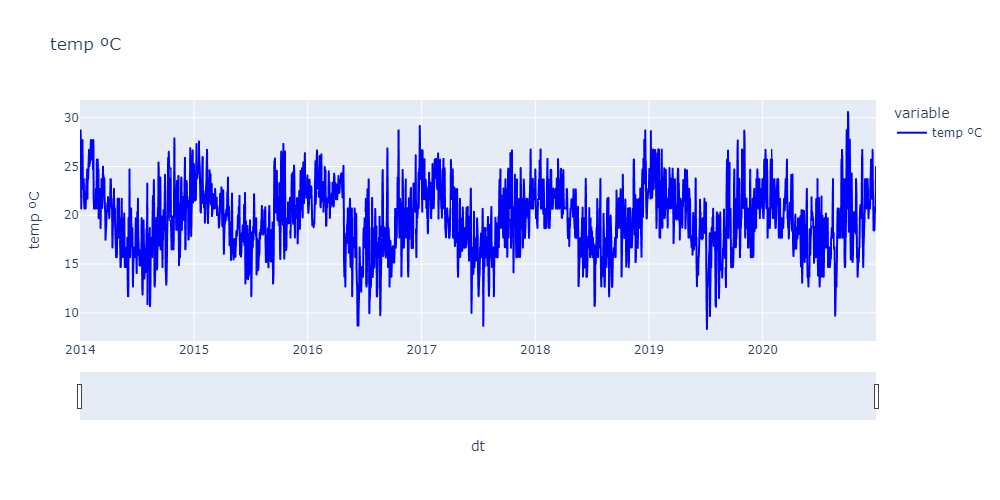

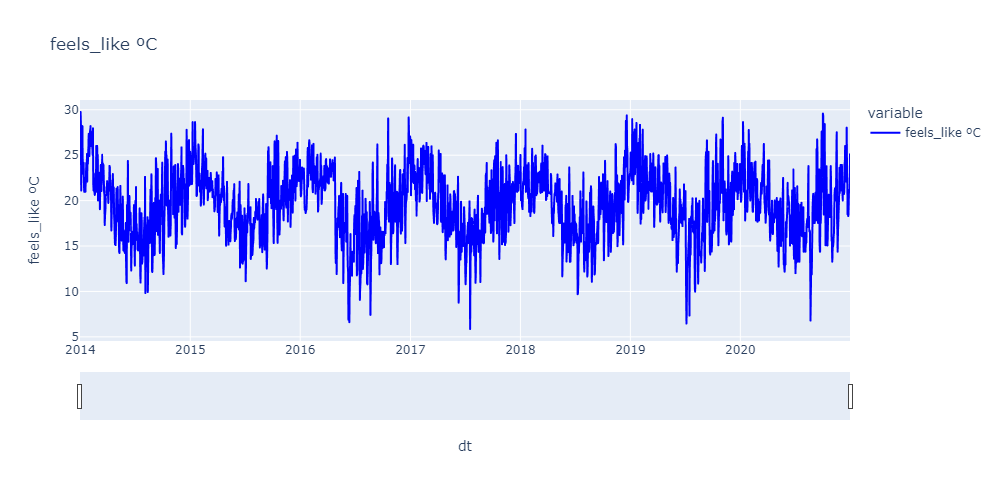

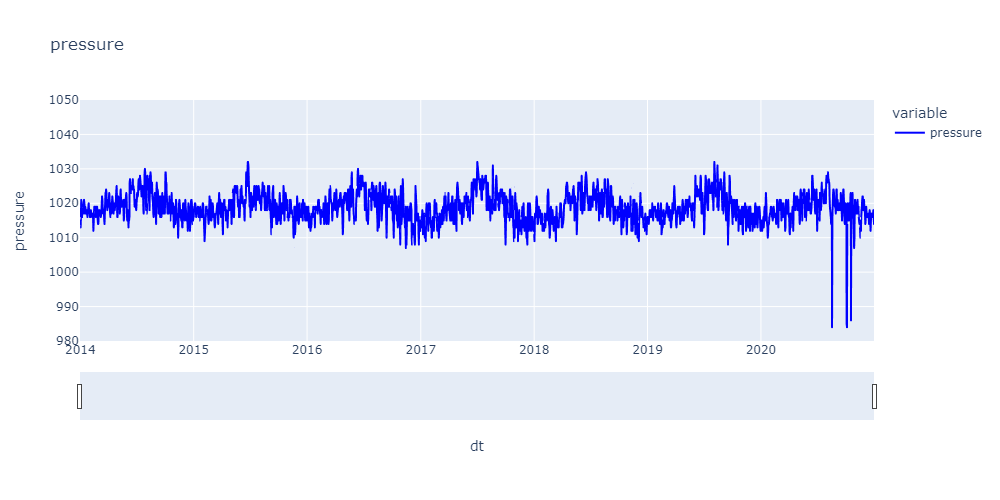

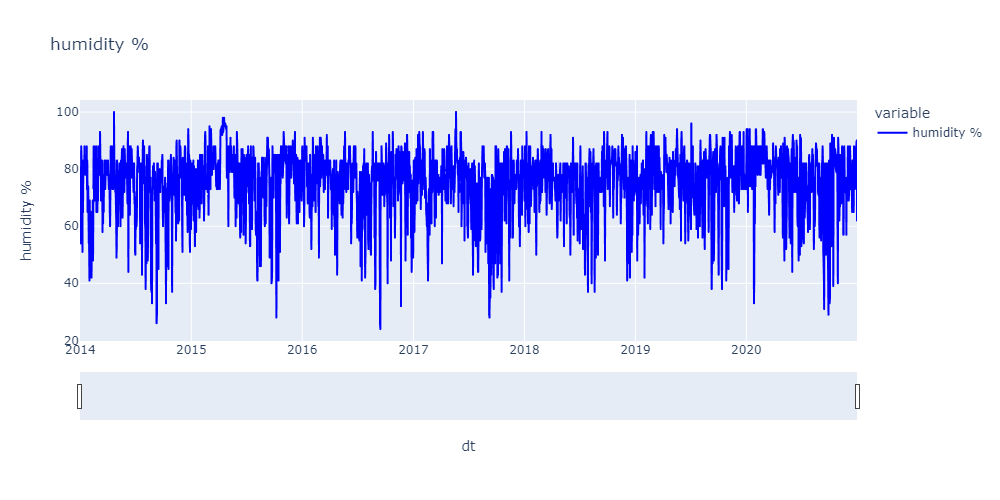

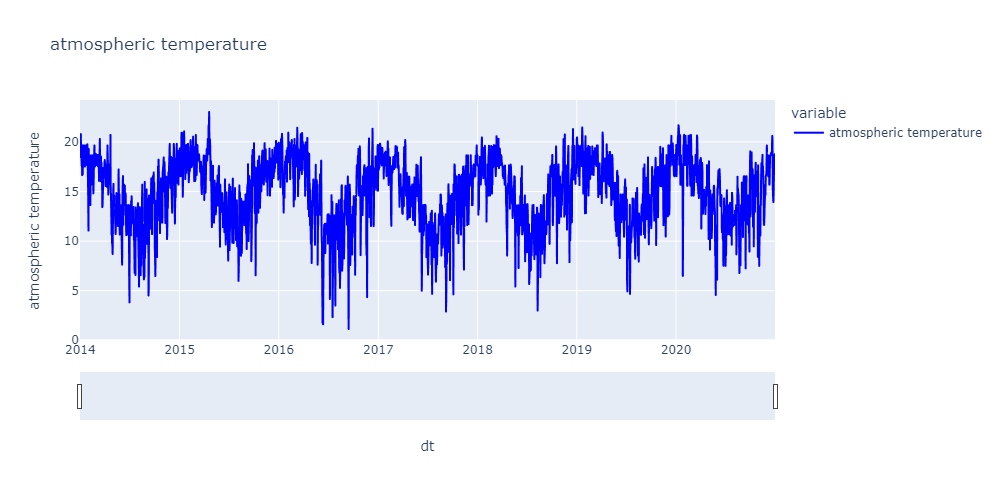

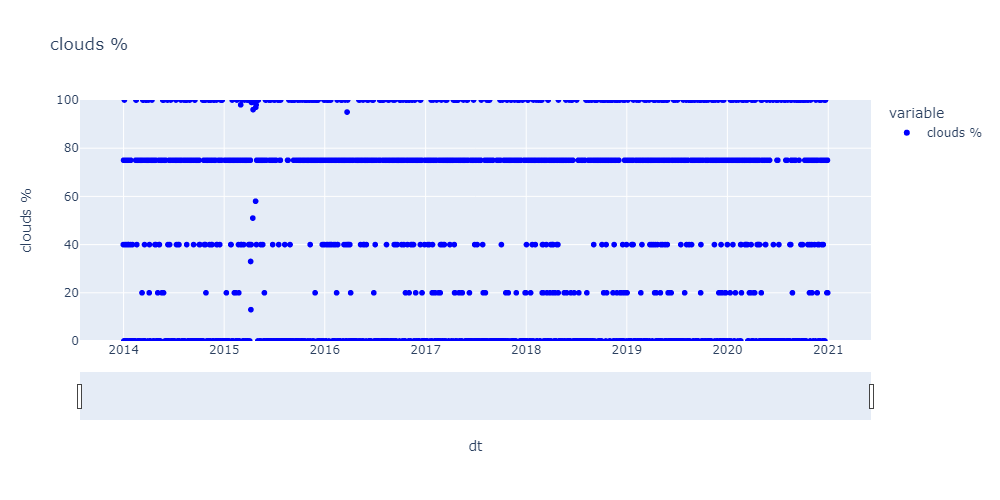

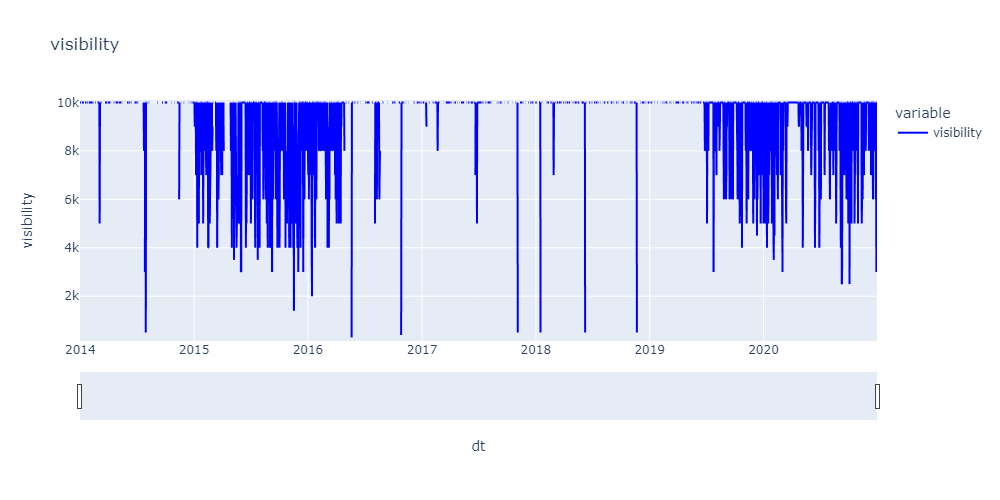

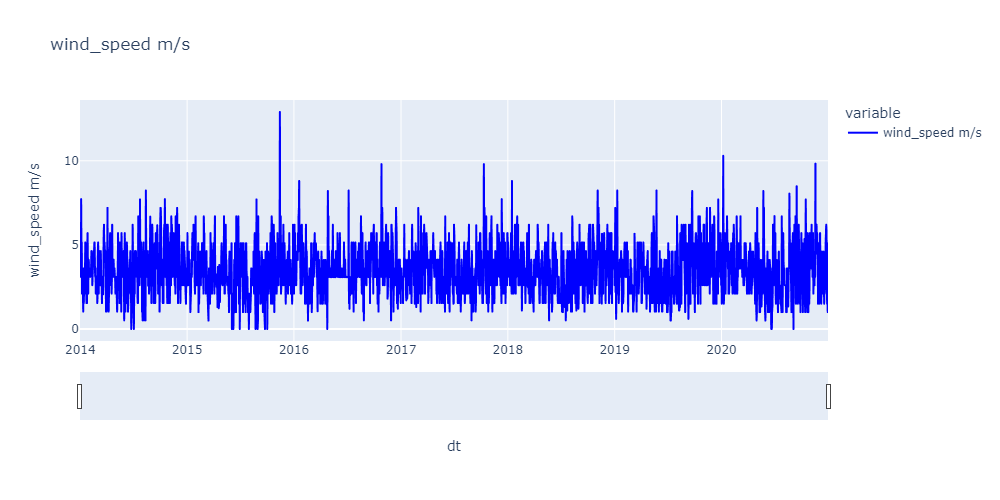

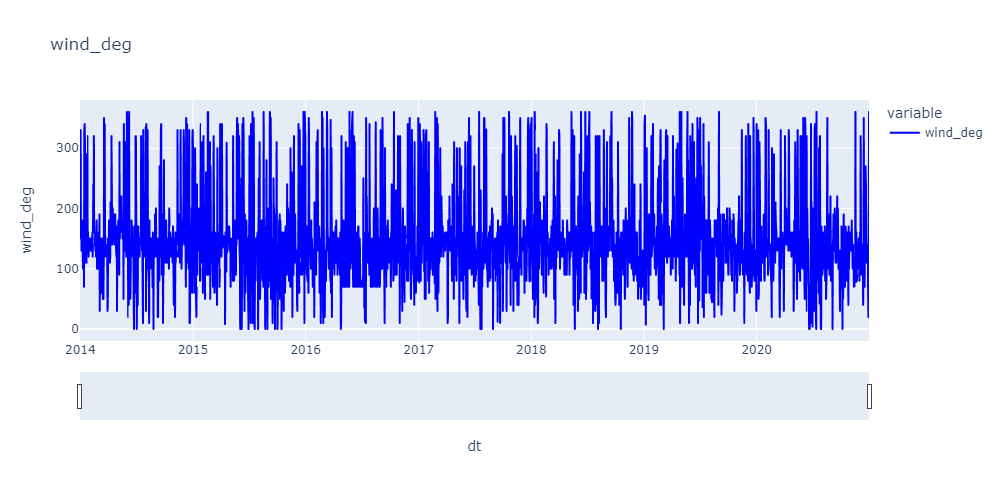

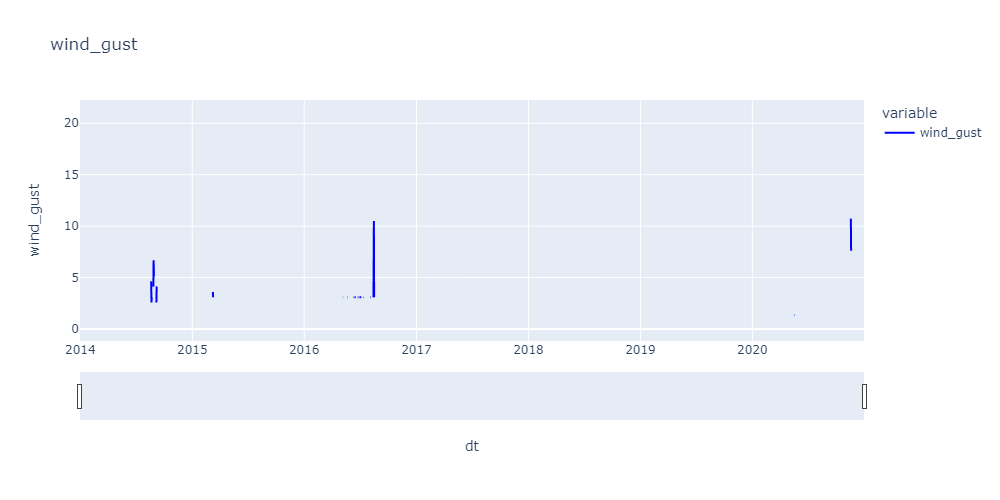

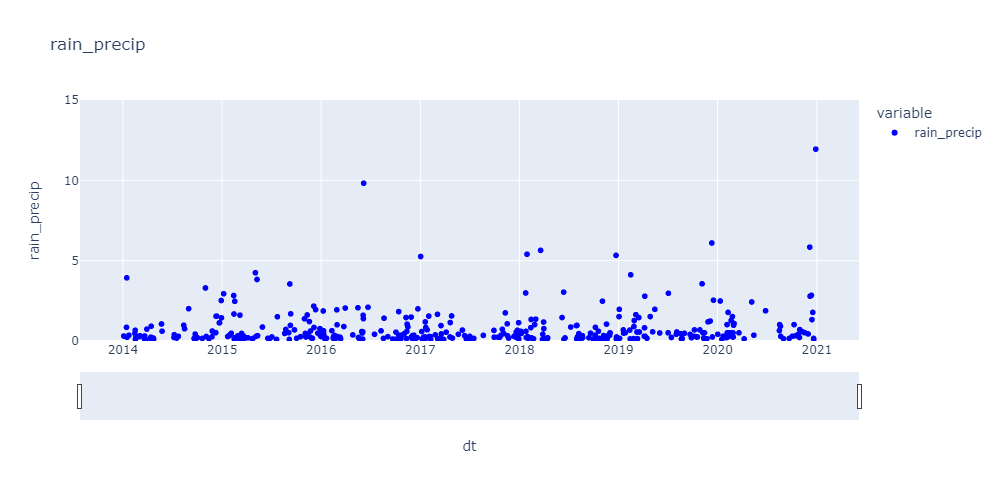

In [34]:
# #HISTOGRAMS
df_hist = df.drop(['sunrise', 'sunset', 'weather', 'weather_id'], axis=1) #deleting non numeric features 

columns = [ column for column in df_hist.columns]
del columns[0] #deleting Date --> x axis for all
          
for column in columns:  
    if column == 'visibility':
        fig = px.line(df, x='dt', y=[column],
                 title = column, 
                 color_discrete_sequence = ['blue'],
                     height = 500, width = 1000)

        fig.update_layout(yaxis_title = column)

        fig.update_xaxes(rangeslider_visible=True)

        fig.update_yaxes(range=[150, 10100])

        fig.show(renderer = 'png')
        #fig.show() #---> run in interactive mode
    
    elif column == 'pressure':
        fig = px.line(df, x='dt', y=[column],
                 title = column, 
                 color_discrete_sequence = ['blue'],
                     height = 500, width = 1000)

        fig.update_layout(yaxis_title = column)

        fig.update_xaxes(rangeslider_visible=True)

        fig.update_yaxes(range=[980, 1050])

        fig.show(renderer = 'png')
        #fig.show() #---> run in interactive mode

    elif column == 'clouds %':
        fig = px.scatter(df, x='dt', y=[column],
                 title = column, 
                 color_discrete_sequence = ['blue'],
                     height = 500, width = 1000)

        fig.update_layout(yaxis_title = column)

        fig.update_xaxes(rangeslider_visible=True)

        fig.update_yaxes(range=[0, 100])

        fig.show(renderer = 'png')
        #fig.show() #---> run in interactive mode
    
    elif column == 'rain_precip':
        fig = px.scatter(df, x='dt', y=[column],
                 title = column, 
                 color_discrete_sequence = ['blue'],
                     height = 500, width = 1000)

        fig.update_layout(yaxis_title = column)

        fig.update_xaxes(rangeslider_visible=True)

        fig.update_yaxes(range=[0, 15])

        fig.show(renderer = 'png')
        #fig.show() #---> run in interactive mode


    else:
        fig = px.line(df, x='dt', y=[column],
                            title = column, 
                            color_discrete_sequence = ['blue'], 
                     height = 500, width = 1000)

        fig.update_layout(yaxis_title = column)

        fig.update_xaxes(rangeslider_visible=True)

        fig.show(renderer = 'png')
        #fig.show() #---> run in interactive mode

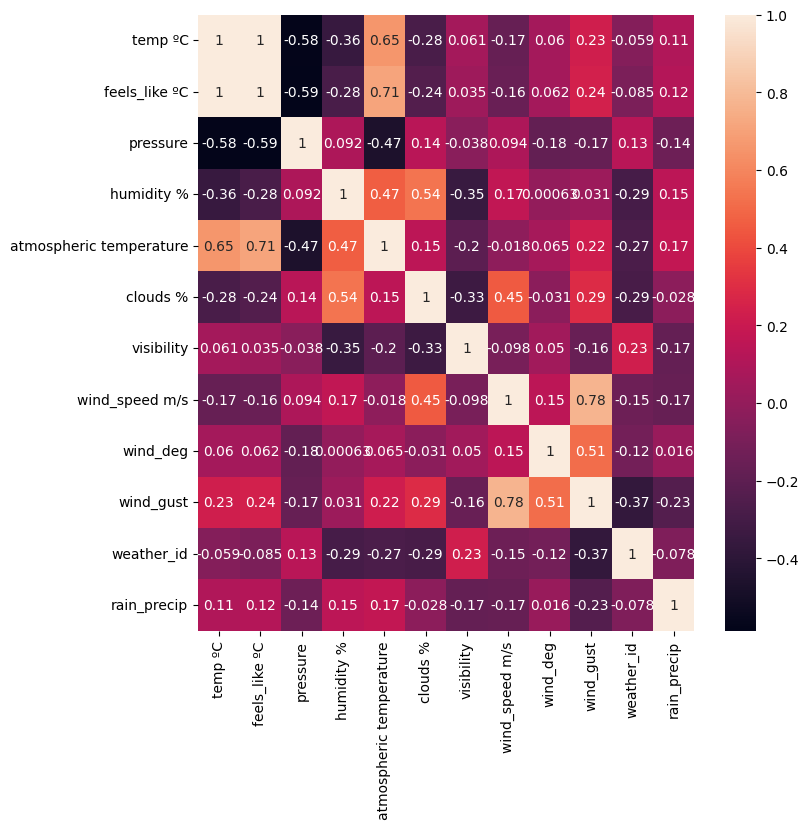

In [35]:
#correlation

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True);